In [1]:
import os
#current working dir
os.getcwd()

'D:\\ML\\Assignments\\Linear Regression'

In [2]:
#import all lib at once
import pandas as pd, matplotlib.pyplot as plt

In [3]:
#change current directory
os.chdir('D:\\ML\\04. Linear Regression')

In [4]:
#current working directory
os.getcwd()

'D:\\ML\\04. Linear Regression'

In [5]:
x = [60,40,40,50,52]
df = pd.DataFrame(x,columns=['Salary (k)'])
df

,Salary (k)
0,60
1,40
2,40
3,50
4,52


In [6]:
#Loading dataframe
df = pd.read_csv('Height-Weight Data.csv')

In [7]:
#first 5 rows
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [8]:
#last 5 rows
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [9]:
#total Rows and columns
df.shape 

(3501, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [11]:
#checking null values
df.isnull()

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


In [12]:
#Total null values
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [13]:
#dataframe columns
df.columns

Index(['Height', 'Weight'], dtype='object')

In [14]:
#single column
df.Height    #or df['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
3496    69.296830
3497    70.542201
3498    73.912549
3499    67.396021
3500    72.738970
Name: Height, Length: 3501, dtype: float64

In [15]:
df.Weight.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [16]:
#descriptive statistics
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


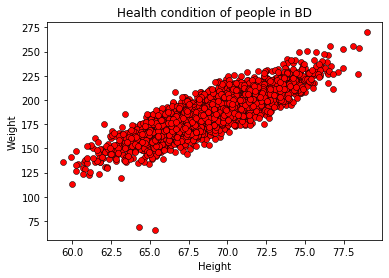

In [17]:
#pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
plt.scatter(df.Height,df.Weight,color='red',marker='o',edgecolors='black',linewidths=.5 )
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Health condition of people in BD')
plt.show()

### split dataset into train test dataset

In [18]:
#df.drop(['col1,col2,col3',axis=1])          dropping multiple column
x = df.drop('Weight',axis=1)                #Height in 2D after dropping weight
y = df[['Weight']]                          #Weight in 2D

In [19]:
from sklearn.model_selection import train_test_split

#train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)[source]
xtrain,xtest,ytrain,ytest = train_test_split(x, y, train_size=.3, random_state=1)

In [20]:
xtrain

,Height
3045,70.968528
2364,69.742642
2932,67.724936
2783,72.297584
2397,66.558114
...,...
2763,68.457061
905,66.539812
1096,75.999957
235,70.555244


In [21]:
ytrain

,Weight
3045,183.196713
2364,199.891272
2932,180.051856
2783,212.058247
2397,154.627588
...,...
2763,186.208566
905,175.093255
1096,224.440459
235,198.460249


In [22]:
xtrain.shape

(1050, 1)

In [23]:
ytrain.shape

(1050, 1)

### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
#train linear model
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#coefficient
m = lr.coef_
m

array([[5.97605415]])

In [27]:
#intercept
c = lr.intercept_
c

array([-225.6877839])

In [28]:
#first 10 rows
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [29]:
x1 = 70.542201
y = m*x1+c
y

array([[195.87622912]])

In [30]:
lr.predict([[70.542201]])

array([[195.87622912]])

In [31]:
df['Predicted_value'] = lr.predict(x)

In [32]:
df.head(10)

,Height,Weight,Predicted_value
0,73.847017,241.893563,215.625989
1,68.781904,162.310473,185.356599
2,74.110105,212.740856,217.198219
3,71.730978,220.042470,202.980427
4,69.881796,206.349801,191.929612
5,67.253016,152.212156,176.219880
6,68.785081,183.927889,185.375586
7,68.348516,167.971111,182.766646
8,67.018950,175.929440,174.821088
9,63.456494,156.399676,153.531660


### Accurecy Measurements

In [33]:
#training accuracy (in percentage)
lr.score(xtrain,ytrain) * 100

73.33630970543594

In [34]:
#testing accuracy (in percentage)
lr.score(xtest,ytest) *100

73.19318916534414

### Error Measurements

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [36]:
#training error
ytrain1 = lr.predict(xtrain)
ytrain1

array([[198.42397972],
       [191.09802195],
       [179.0401008 ],
       ...,
       [228.49207481],
       [195.95417336],
       [194.24571491]])

In [37]:
#training error
mse = mean_squared_error(ytrain,ytrain1)
print('For Training Data:\nMean Squared Error (MSE) : ',mse)
mae = mean_absolute_error(ytrain,ytrain1)
print('Mean Absolute Error (MAE) : ',mae)

For Training Data:
Mean Squared Error (MSE) :  98.72889716385785
Mean Absolute Error (MAE) :  7.899089005943219


In [38]:
ytest1 = lr.predict(xtest)
ytest1

array([[177.11512478],
       [190.00673937],
       [167.59581338],
       ...,
       [215.43612225],
       [204.09988273],
       [180.29327069]])

In [39]:
#testing error
mse = mean_squared_error(ytest,ytest1)
print('For Testing Data:\nMean Squared Error (MSE) : ',mse)
mae = mean_absolute_error(ytest,ytest1)
print('Mean Absolute Error (MAE) : ',mae)

For Testing Data:
Mean Squared Error (MSE) :  109.11724434757244
Mean Absolute Error (MAE) :  8.144275364945507


### Best Fit Line

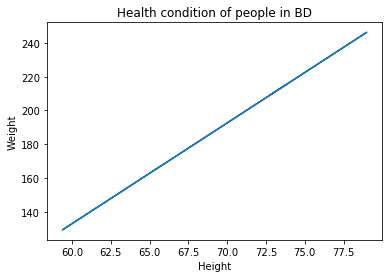

In [40]:
plt.plot(df.Height,lr.predict(x))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Health condition of people in BD')
plt.show()

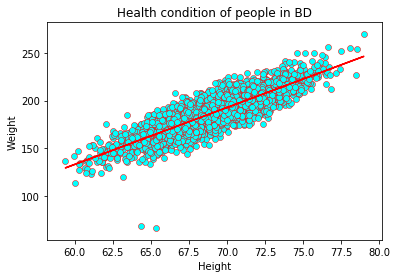

In [41]:
plt.plot(df.Height,lr.predict(x),c='red')
plt.scatter(df.Height,df.Weight,c='cyan',marker='o',edgecolors='red',linewidths=.5 )
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Health condition of people in BD')
plt.show()

In [42]:
#mean value of Height
df.Height.mean()

69.02441087268797

In [43]:
#mean value of Weight
df.Weight.mean()

186.89125797946284

In [44]:
xtrain

,Height
3045,70.968528
2364,69.742642
2932,67.724936
2783,72.297584
2397,66.558114
...,...
2763,68.457061
905,66.539812
1096,75.999957
235,70.555244


## Import & Export Dataframe

In [45]:
#export to csv
xtrain.to_csv('xtrain.csv')
df.to_csv('newdf.csv')

### using pickle

In [46]:
import pickle as pk

In [47]:
# saving model to a binary file
with open('linear-regression','wb') as file:
    pk.dump(lr,file)             #or pk.dump(lr,open('linear-regression-copy.ipynb','wb'))

In [48]:
#load a binary file
with open('linear-regression','rb') as file:
    lr = pk.load(file)           #or pk.load(open('linear-regression-copy.ipynb','rb'))

In [49]:
lr.predict([[3000]])

array([[17702.47466531]])

### Using Joblib 

In [50]:
import joblib as jb

In [51]:
#Saving model to a binary file
jb.dump(lr,'linear-regression')

['linear-regression']

In [52]:
#load a binary file
lr = jb.load('linear-regression')

In [53]:
lr.predict([[3000]])

array([[17702.47466531]])